<a href="https://colab.research.google.com/github/AkshaySarkar/Drone-Detection-using-Python/blob/main/Drone_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
import math
from keras.models import Sequential
from keras.layers import Dense
from matplotlib.lines import Line2D

In [68]:
df = pd.read_excel('/content/DummyData_project (7).xlsx')
df.tail(10)

,Wingspan(m),Speed(m/s),Altitude(m),Rf Signal Strength(dbm),Rf Signal frequency(MHz),Class
144,37.01,11.23,35.89,10.98,523.21,Drone
145,26.76,8.65,38.45,8.43,288.76,Drone
146,22.56,7.09,30.89,11.67,224.56,Drone
147,15.78,6.21,25.43,11.12,157.89,Drone
148,11.34,5.43,20.98,12.45,92.76,Bird
149,14.87,6.09,18.87,11.34,117.45,Bird
150,9.98,4.21,17.34,10.23,82.65,Bird
151,9.45,4.56,19.09,9.76,87.34,Bird
152,12.67,5.98,20.56,10.34,129.56,Bird
153,7.21,3.76,16.98,8.87,72.54,Bird


In [69]:
dataMapping = {
    "Drone": 1,
    "Drone A": 1,
    "Drone B": 1,
    "Bird": 2
}



In [70]:
df['ClassNum'] = df['Class'].map(dataMapping)
df.tail(10)

,Wingspan(m),Speed(m/s),Altitude(m),Rf Signal Strength(dbm),Rf Signal frequency(MHz),Class,ClassNum
144,37.01,11.23,35.89,10.98,523.21,Drone,1
145,26.76,8.65,38.45,8.43,288.76,Drone,1
146,22.56,7.09,30.89,11.67,224.56,Drone,1
147,15.78,6.21,25.43,11.12,157.89,Drone,1
148,11.34,5.43,20.98,12.45,92.76,Bird,2
149,14.87,6.09,18.87,11.34,117.45,Bird,2
150,9.98,4.21,17.34,10.23,82.65,Bird,2
151,9.45,4.56,19.09,9.76,87.34,Bird,2
152,12.67,5.98,20.56,10.34,129.56,Bird,2
153,7.21,3.76,16.98,8.87,72.54,Bird,2


In [71]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Print correlation matrix
print(corr_matrix)

                          Wingspan(m)  Speed(m/s)  Altitude(m)  \
Wingspan(m)                  1.000000    0.700399    -0.533005   
Speed(m/s)                   0.700399    1.000000     0.103009   
Altitude(m)                 -0.533005    0.103009     1.000000   
Rf Signal Strength(dbm)      0.721383    0.100659    -0.887379   
Rf Signal frequency(MHz)    -0.612504    0.055284     0.957878   
ClassNum                    -0.048964   -0.487987    -0.703480   

                          Rf Signal Strength(dbm)  Rf Signal frequency(MHz)  \
Wingspan(m)                              0.721383                 -0.612504   
Speed(m/s)                               0.100659                  0.055284   
Altitude(m)                             -0.887379                  0.957878   
Rf Signal Strength(dbm)                  1.000000                 -0.973328   
Rf Signal frequency(MHz)                -0.973328                  1.000000   
ClassNum                                 0.543857              

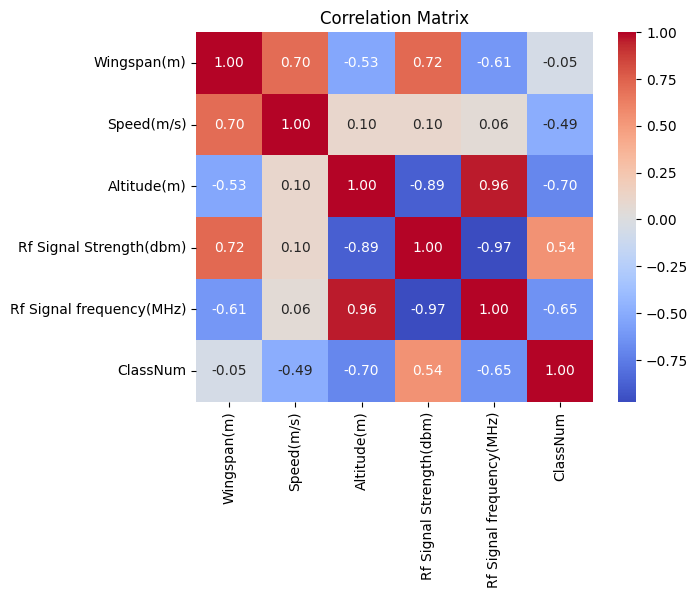

In [72]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
strong_corr_features = corr_matrix['ClassNum'].abs().sort_values(ascending=False)[:5]
print("Features with strong correlation with ClassNum:\n", strong_corr_features)

Features with strong correlation with ClassNum:
 ClassNum                    1.000000
Altitude(m)                 0.703480
Rf Signal frequency(MHz)    0.649076
Rf Signal Strength(dbm)     0.543857
Speed(m/s)                  0.487987
Name: ClassNum, dtype: float64


In [75]:
X = df[['Altitude(m)', 'Rf Signal frequency(MHz)', 'Rf Signal Strength(dbm)', 'Speed(m/s)']]
y = df['ClassNum']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [77]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.967741935483871


In [79]:
train_acc = []
val_acc = []
for i in range(10):
    scores = cross_val_score(model, X, y, cv=10)
    train_acc.append(np.mean(scores))
    val_acc.append(scores[i])

# print the training and validation accuracies for each fold
for i in range(10):
    print("Fold ", i+1, " - Training accuracy: ", train_acc[i], " - Validation accuracy: ", val_acc[i])

Fold  1  - Training accuracy:  0.9800000000000001  - Validation accuracy:  1.0
Fold  2  - Training accuracy:  0.9800000000000001  - Validation accuracy:  1.0
Fold  3  - Training accuracy:  0.9800000000000001  - Validation accuracy:  1.0
Fold  4  - Training accuracy:  0.9800000000000001  - Validation accuracy:  1.0
Fold  5  - Training accuracy:  0.9866666666666667  - Validation accuracy:  1.0
Fold  6  - Training accuracy:  0.9866666666666667  - Validation accuracy:  1.0
Fold  7  - Training accuracy:  0.9800000000000001  - Validation accuracy:  1.0
Fold  8  - Training accuracy:  0.9800000000000001  - Validation accuracy:  0.9333333333333333
Fold  9  - Training accuracy:  0.9800000000000001  - Validation accuracy:  0.9333333333333333
Fold  10  - Training accuracy:  0.9800000000000001  - Validation accuracy:  0.9333333333333333


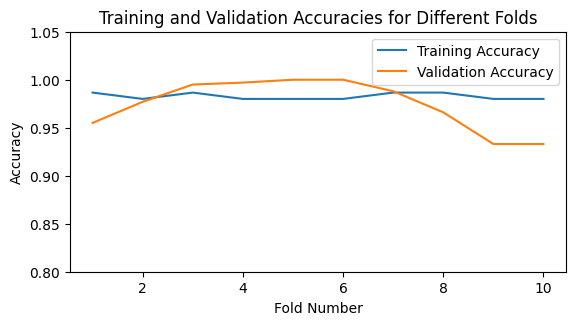

In [80]:
train_accuracies = [0.9866, 0.9800, 0.9866, 0.9800, 0.9800, 0.9800, 0.9866, 0.9866, 0.9800, 0.9800]
val_accuracies = [0.955, 0.977, 0.995, 0.997, 1.0, 1.0, 0.988, 0.966, 0.933, 0.933]
# Create a list of fold numbers
folds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(folds, train_accuracies, label='Training Accuracy')
plt.plot(folds, val_accuracies, label='Validation Accuracy')
plt.ylim([0.8, 1.05])
# Add axis labels and a title to the plot
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Folds')

# Add a legend to the plot
plt.legend()
plt.subplots_adjust(top=0.9, bottom=0.4)
# Display the plot
plt.show()

In [81]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[40  1]
 [ 1 20]]


In [82]:
f1 = f1_score(y_test, y_pred)
print('F1-score:', f1)

F1-score: 0.975609756097561


In [83]:
print(y_pred)

[2 2 2 1 2 1 2 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2]


Decision Tree: 0.9800000000000001 (0.030550504633038926)
SVM: 0.8766666666666666 (0.14585952145814823)
Random Forest: 0.9804166666666667 (0.029933375092769676)
Naive Bayes: 0.8574999999999999 (0.1699448439935734)


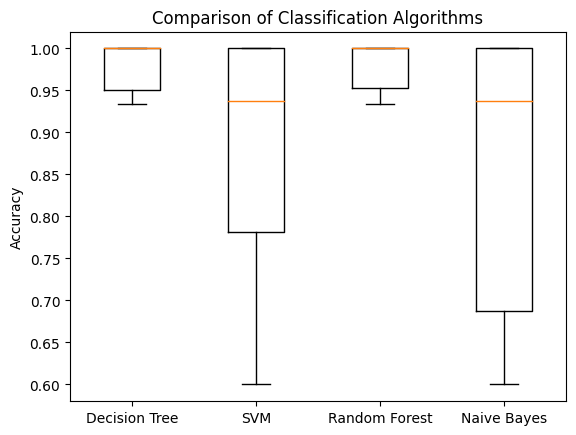

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
svm = SVC()
svm.fit(X_train, y_train)
NB = GaussianNB()
NB.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
NB_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)
NB_acc = accuracy_score(y_test, NB_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
NB_f1 = f1_score(y_test, NB_pred, average='weighted')
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB())
]
results, names = [], []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

plt.boxplot(results, labels=names)
plt.title('Comparison of Classification Algorithms')
plt.ylabel('Accuracy')
plt.show()

In [87]:
print(f'DT_Accuracy: {accuracy}')
print(f'Rf_Accuracy: {rf_acc}')
print(f'SVM_Accuracy: {svm_acc}')

DT_Accuracy: 0.967741935483871
Rf_Accuracy: 0.9516129032258065
SVM_Accuracy: 0.8548387096774194


In [88]:
print(f' DT_F1 Score: {f1}')
print(f'Rf_F1 Score: {rf_f1}')
print(f'SVM_F1 Score: {svm_f1}')

 DT_F1 Score: 0.975609756097561
Rf_F1 Score: 0.951314305214564
SVM_F1 Score: 0.8584331797235024


In [89]:
# loop through the predicted labels and the corresponding instances
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        # generate an alert for this instance
        print("Drone detected in instance\033[1;33m",i,"\033[0mof the test set")

Drone detected in instance 3 of the test set
Drone detected in instance 5 of the test set
Drone detected in instance 7 of the test set
Drone detected in instance 8 of the test set
Drone detected in instance 9 of the test set
Drone detected in instance 10 of the test set
Drone detected in instance 11 of the test set
Drone detected in instance 14 of the test set
Drone detected in instance 15 of the test set
Drone detected in instance 16 of the test set
Drone detected in instance 18 of the test set
Drone detected in instance 20 of the test set
Drone detected in instance 21 of the test set
Drone detected in instance 23 of the test set
Drone detected in instance 25 of the test set
Drone detected in instance 27 of the test set
Drone detected in instance 29 of the test set
Drone detected in instance 31 of the test set
Drone detected in instance 32 of the test set
Drone detected in instance 33 of the test set
Drone detected in instance 35 of the test set
Drone detected in instance 36 of the te

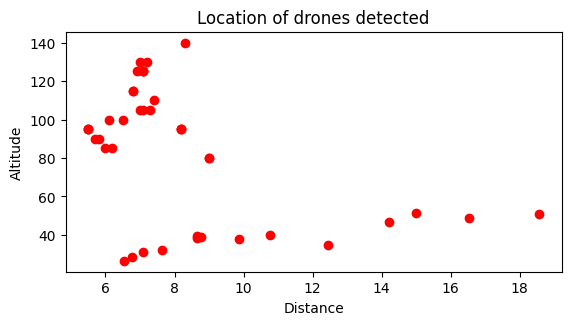

In [90]:

X_test['y_pred'] = y_pred

# create a new dataframe with instances where y_pred is 1
drone_df = X_test[X_test['y_pred'] == 1]
plt.scatter(drone_df['Speed(m/s)'], drone_df['Altitude(m)'], color='red')

# Plot a red dot at the location of each detected drone
#plt.scatter(detected[df['Speed(m/s)']], detected[df['Altitude(m)']], color='red')
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('Location of drones detected')

plt.subplots_adjust(top=0.9,bottom= 0.4)
# Show the plot
plt.show()

In [91]:
df['RCS'] = 10**(df['Rf Signal Strength(dbm)']/10)
df.head(5)

,Wingspan(m),Speed(m/s),Altitude(m),Rf Signal Strength(dbm),Rf Signal frequency(MHz),Class,ClassNum,RCS
0,43.23,12.45,34.67,11.89,567.21,Drone,1,15.452544
1,32.11,8.76,43.78,8.92,321.87,Drone,1,7.798301
2,27.89,7.65,38.99,10.56,456.32,Drone,1,11.376273
3,49.02,16.78,54.21,14.76,678.54,Drone,1,29.922646
4,54.34,18.56,51.09,17.34,765.43,Drone,1,54.200089


In [92]:
bin_edges = [0, 1, 2, 6, 10, 20, 40, 100, float('inf')]
bin_labels = ['Conventional Unmanned Winged missile', 'Human Body', 'Commercial drone', 'Small fighter drone', 'Large fighter drone', 'Medium bomber or airliner', 'Large bomber or airliner', 'Jumbo airliner']

# use pd.cut to map the data to the new categories
df['Drone_type'] = pd.cut(df['RCS'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# print the new DataFrame with the categorical column
df.head(5)

,Wingspan(m),Speed(m/s),Altitude(m),Rf Signal Strength(dbm),Rf Signal frequency(MHz),Class,ClassNum,RCS,Drone_type
0,43.23,12.45,34.67,11.89,567.21,Drone,1,15.452544,Large fighter drone
1,32.11,8.76,43.78,8.92,321.87,Drone,1,7.798301,Small fighter drone
2,27.89,7.65,38.99,10.56,456.32,Drone,1,11.376273,Large fighter drone
3,49.02,16.78,54.21,14.76,678.54,Drone,1,29.922646,Medium bomber or airliner
4,54.34,18.56,51.09,17.34,765.43,Drone,1,54.200089,Large bomber or airliner


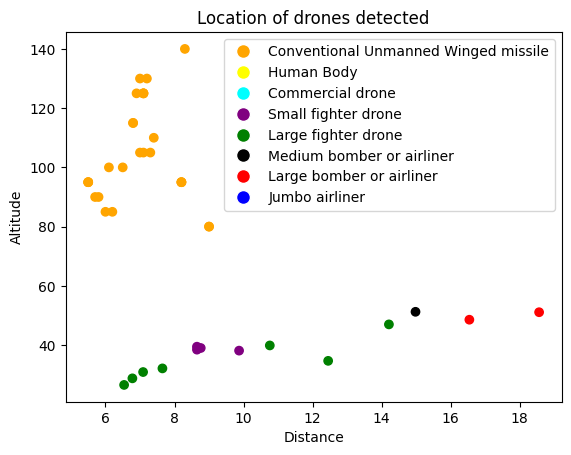

In [94]:
X_test['Drone_type'] = df['Drone_type']

# create a new dataframe with instances where y_pred is 1
drone_df = X_test[X_test['y_pred'] == 1]
drone_type_colors = {'Conventional Unmanned Winged missile': 'orange', 'Human Body': 'yellow', 'Commercial drone': 'cyan', 'Small fighter drone': 'purple', 'Large fighter drone': 'green', 'Medium bomber or airliner': 'black', 'Large bomber or airliner': 'red', 'Jumbo airliner': 'blue'}

# create a list of colors for each drone in drone_df
colors = [drone_type_colors[Drone_type] for Drone_type in drone_df['Drone_type']]

plt.scatter(drone_df['Speed(m/s)'], drone_df['Altitude(m)'], c= colors)

# Plot a red dot at the location of each detected drone
#plt.scatter(detected[df['Speed(m/s)']], detected[df['Altitude(m)']], color='red')
plt.xlabel('Distance')
plt.ylabel('Altitude')
plt.title('Location of drones detected')


legend_elements = [Line2D([0], [0], marker='o', color='w', label=Drone_type, markerfacecolor=color, markersize=10) for Drone_type, color in drone_type_colors.items()]
plt.legend(handles=legend_elements, loc='upper right')
# Show the plot
plt.show()